## Import utility functions

In [ ]:
from AutoPhenom import *

## Actual code

In [ ]:
print(dir(ppi))

## From CD Test

In [ ]:
def setSpot(phenom, imageSize, position):
    mode = ppi.SemViewingMode(ppi.ScanMode.Spot, ppi.ScanParams(16, 16, 1, ppi.DetectorMode.All, False, 0, ppi.Position((position[0] + 0.5) / imageSize[0] - 0.5, (position[1] + 0.5) / imageSize[1] - 0.5)))
    ppi.SetSemViewingMode(mode)
    print('test')
    
 
def writeSpectrum(spectrum, filename):
    msa = ppi.Spectrum.MsaData()
    msa.Spectrum = spectrum
    print(msa)
    print(msa.Spectrum)
    #msa.Spectrum.WriteMsaFile(msa, filename)

In [ ]:
type(ppi.Spectrometer)

In [4]:
import PyPhenom as ppi
dpp = ppi.Spectrometer
print(type(dpp))
 
settings = ppi.LoadEidSettings()
dpp.ApplySettings(settings.spot)

size = (2, 2)
for y in range(0, size[1]):
    for x in range(0, size[0]): 
        setSpot(phenom, size, (x, y))

        dpp.ClearSpectrum()
        dpp.Start()
        time.sleep(3)
        dpp.Stop()
        print('jack')
        writeSpectrum(dpp.GetSpectrum(), 'Spectrum_{0:03d}-{1:03d}.msa'.format(x, y))

<class 'Boost.Python.class'>


ArgumentError: Python argument types in
    None.ApplySettings(PulseProcessorPreset)
did not match C++ signature:
    ApplySettings(class std::shared_ptr<class PhenomWorld::Spectrometer> {lvalue}, struct PhenomWorld::PulseProcessorPreset settings)

## From PyPhenom 2.1 manual

In [ ]:
import PyPhenom as ppi
import license
phenom = ppi.Phenom(license.PhenomAddress, license.PhenomUsername, license.PhenomPassword)
print("Has EDX license: " + str(ppi.HasLicense(ppi.Features.Spectroscopy)))
print("Has mapping license: " + str(ppi.HasLicense(ppi.Features.EdsMap)))

analyzer = ppi.Spectroscopy.EdxAnalysis
print(analyzer)

In [ ]:
import PyPhenom as ppi
import license
phenom = ppi.Phenom(license.PhenomAddress, license.PhenomUsername, license.PhenomPassword)
print("Has EDX license: " + str(ppi.HasLicense(ppi.Features.Spectroscopy)))
print("Has mapping license: " + str(ppi.HasLicense(ppi.Features.EdsMap)))
analyzer = ppi.Application.ElementIdentification.EdsJobAnalyzer(phenom)
settings = phenom.LoadPulseProcessorSettings()
analyzer.preset = settings.spot
analyzer.AcquireDriftCorrectionReference()
analyzer.EdsAnalyzerFailure.connect(lambda msg: 
print('EdsAnalyzerFailure("{}")'.format(msg)))
spotData = analyzer.AddSpot(ppi.Position(0, 0), maxTime=9.5, maxCounts=10000)
lineData = analyzer.AddLine(ppi.Line(ppi.Position(0, 0), ppi.Position(0.5, 0)), 
numberOfPoints=64)
mapData = analyzer.AddMap(ppi.RectangleD(-0.5, -0.3125, 0.5, +0.3125), mapSize=64, 
timePerPoint=0.05)
analyzer.Wait()
print(ppi.Spectroscopy.Quantify(spotData.spotSpectrum))
ppi.Spectroscopy.WriteMsaFile(spotData.spotSpectrum, 'SpotSpectrum.msa')
semImage = phenom.SemAcquireImage(1920, 1200)
image = ppi.Spectroscopy.EdsImage(semImage, 'Image1')
image.AddAnalysis(spotData)
image.AddAnalysis(lineData)
image.AddAnalysis(mapData)
project = ppi.Spectroscopy.EdsProject()
project.AddImage(image)
ppi.Spectroscopy.SaveEdsProject(project, 'Spectrum.elid')
ppi.Spectroscopy.SaveEdsProject(project, 'Spectrum.phen')

## From old codes (1.2.5)

## Get phenom ready for silly stuff

In [1]:
import PyPhenom as ppi
import license

phenom = ppi.Phenom(license.PhenomAddress, license.PhenomUsername, license.PhenomPassword)
phenom.Activate()
phenom.MoveToSem()

## Print Directory


In [44]:
import PyPhenom as ppi
import license
import inspect
import hyperspy.api as hs

phenom = ppi.Phenom(license.PhenomAddress, license.PhenomUsername, license.PhenomPassword)
phenom.GetEnableDriftCorrection
print(dir(phenom))

#print(inspect.getfullargspec(ppi.Spectrometer.GetSpectrum))

['AbortAcquisition', 'AcquireSpectrum', 'Activate', 'ActivateFeature', 'AddUser', 'BackupSupplyAvailable', 'BackupSupplyStatusChanged', 'BeginSemAcquisition', 'CanJogInWorkArea', 'CanResetSpectrometer', 'ChangePassword', 'CloseDoor', 'ConfirmBakeout', 'Connected', 'ConnectedChanged', 'CreateNewSourceStatistics', 'DisconnectSpectrometer', 'DoorStatusChanged', 'ExclusiveAccessStatusChanged', 'FieldWidthChanged', 'FieldWidthRangeChanged', 'GenerateSysInfo', 'GetActivatedFeatures', 'GetApiRetryCount', 'GetBackupSupplyStatus', 'GetCurrentUser', 'GetDatabarFields', 'GetDatabarLabel', 'GetDoorStatus', 'GetEnableDriftCorrection', 'GetExclusiveAccess', 'GetExclusiveAccessStatus', 'GetHFW', 'GetHFWRange', 'GetImageDeviceCalibration', 'GetInstrumentHealth', 'GetInstrumentMode', 'GetLoginEvents', 'GetNavCamBrightness', 'GetNavCamContrast', 'GetNavCamDeviceMode', 'GetNavCamHFWRange', 'GetNavCamViewingMode', 'GetNavCamWD', 'GetNavCamWDRange', 'GetOperationalMode', 'GetPowerState', 'GetProgressAreaSe

actually run the eds / edcx stufffs

In [ ]:
"""
Created on Mon May  1 19:07:58 2017

@author: Phenom-World
"""
import sys
sys.path.append('code')
from AutoPhenom import getSpotSpectrum
import time
import PyPhenom as ppi
import license
import os

import random

size = (1024,1024)
SavePath = "C:/Users/labuser/PyPhenom1.7Codes/results/7.21.2025/2/"
MainPath = "./"

address = ppi.FindPhenom(1).ip
phenom = ppi.Phenom(address,  license.PhenomUsername,  license.PhenomPassword)

dpp = phenom.Spectrometer
settings = ppi.LoadEidSettings()
dpp.ApplySettings(settings.map)
for i in range(0,30):
    x = random.randint(0,1024)
    y = random.randint(0,1024)
    getSpotSpectrum(x,y,size,SavePath,MainPath,dpp,settings,address,phenom,ppi,dwell_time=15)

x_coord = 0.5
y_coord = 0.25
height = 1024
width = 1024
x_px = 512.0
xypx = 256.0
x_coord = 0.5
y_coord = 0.75
height = 1024
width = 1024
x_px = 512.0
xypx = 768.0


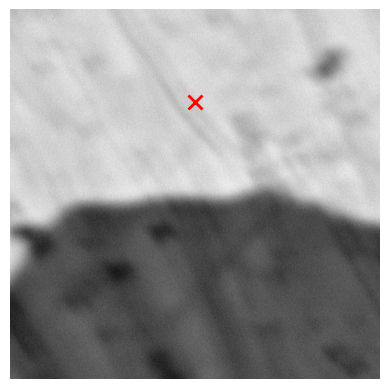

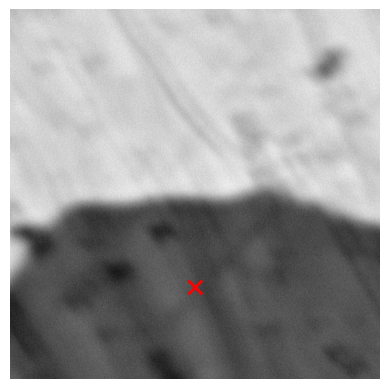

In [ ]:
# Jacques EDS binary region test

import sys
sys.path.append('code')
from AutoPhenom import getSpotSpectrum
import time
import numpy as np
from AutoPhenom import AcquireSEMImage_at_current_location
import PyPhenom as ppi
import license
import os

import random

size = (1024,1024)
SavePath = r"C:\PhenomData\EDS_Coordinate_System_tests\NewCoordinateSystemTests\VerticalTest"
MainPath = "./"

address = ppi.FindPhenom(1).ip
phenom = ppi.Phenom(address,  license.PhenomUsername,  license.PhenomPassword)
# phenom.Activate()
# phenom.MoveToSem()

# Acquire SEM Image at current location
image_path = AcquireSEMImage_at_current_location(SavePath, os.path.basename(SavePath))

dpp = phenom.Spectrometer
settings = ppi.LoadEidSettings()
dpp.ApplySettings(settings.spot)

# EDS Binary Region test

# Horizontal Test
# getSpotSpectrum(0.25, 0.5,size,SavePath,MainPath, image_path, dpp,settings,address,phenom,ppi,dwell_time=5)
# getSpotSpectrum(0.75, 0.5,size,SavePath,MainPath, image_path, dpp,settings,address,phenom,ppi,dwell_time=5)

# Vertical Test
getSpotSpectrum(0.5, 0.25,size,SavePath,MainPath, image_path, dpp,settings,address,phenom,ppi,dwell_time=5)
getSpotSpectrum(0.5, 0.75,size,SavePath,MainPath, image_path, dpp,settings,address,phenom,ppi,dwell_time=5)


## Exit Spot Analysis Mode

In [29]:
import PyPhenom as ppi
import license
address = ppi.FindPhenom(1).ip
phenom = ppi.Phenom(address,  license.PhenomUsername,  license.PhenomPassword)
# Exit Spot mode and enter imaging mode
acqScanParams = ppi.ScanParams()
acqScanParams.size = ppi.Size(1024,1024) 
acqScanParams.detector = ppi.DetectorMode.All 
acqScanParams.nFrames = 16 
acqScanParams.hdr = False 
acqScanParams.center = ppi.Position(0,0)
acqScanParams.scale = 1.0
non_spot_mode = ppi.SemViewingMode(ppi.ScanMode.Imaging, acqScanParams)
phenom.SetSemViewingMode(non_spot_mode)

# Exist imaging mode and enter spot mode
# spot_mode = ppi.SemViewingMode(ppi.ScanMode.spot, acqScanParams)
# phenom.SetSemViewingMode(spot_mode)


In [24]:
phenom.MoveTo(-0.0012,0.0024, algorithm = ppi.NavigationAlgorithm.BacklashOnly)

In [4]:
import numpy as np

array = np.load("C:\PhenomData\Random\RandomEDSAcquisitions\Spectrum at (100.00, 100.00).npy")
print(np.shape(array))

(2048,)


In [ ]:
import inspect
inspect.getfullargspec(ppi.ScanParams.__init__)

TypeError: unsupported callable

### Display spectrums saved in results

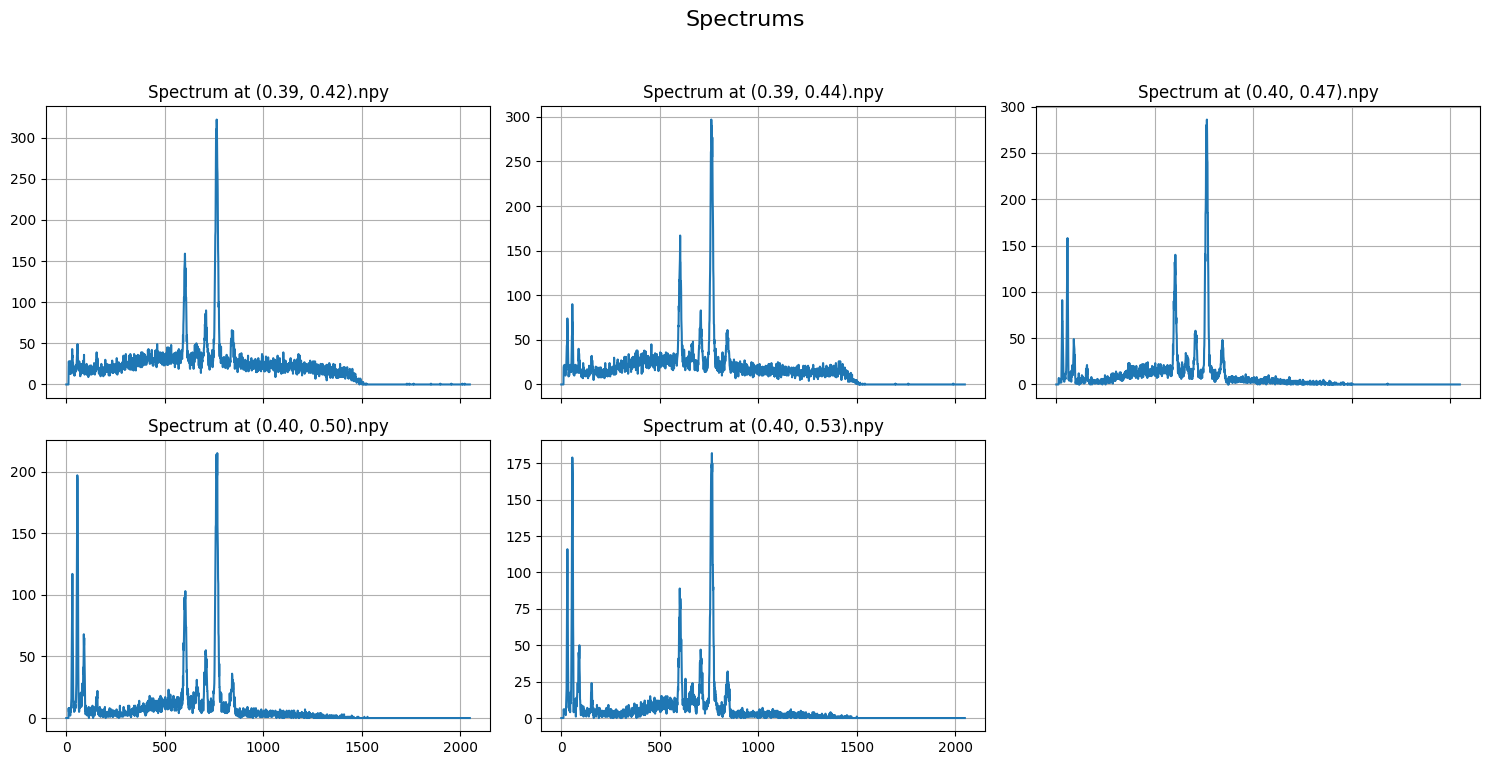

In [2]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import os
import math

path = r"C:\PhenomData\NickelSpheres\Segmentation Project\Testing\Image Chain Tests\Test5\Run_2025-08-12_16-16-30\SEM_image_12\Particles\Particle_1\Spectra_Particle_1"
npy_files = glob.glob(os.path.join(path, "*.npy"))

data_arrays = []
for file in npy_files:
    try:
        data = np.load(file)
        if data.ndim == 1:
            data_arrays.append((os.path.basename(file), data))
        else:
            print(f"Skipping {os.path.basename(file)} as it is not a 1D array.")
    except Exception as e:
        print(f"Could not load or process {os.path.basename(file)}: {e}")

data_arrays = data_arrays[:25] # manual pruning if ur spicy like me

if data_arrays:
    num_plots = len(data_arrays)
    num_cols = math.ceil(math.sqrt(num_plots))
    num_rows = math.ceil(num_plots / num_cols)

    fig, axes = plt.subplots(num_rows, num_cols, sharex=True, figsize=(num_cols * 5, num_rows * 4))

    if num_plots > 1:
        axes = axes.flatten()
    else:
        axes = [axes]

    for i, (filename, data) in enumerate(data_arrays):
        x_values = np.arange(1, len(data) + 1)
        axes[i].plot(x_values, data)
        axes[i].set_title(filename)
        axes[i].grid(True)

    # Hide any unused subplots
    for i in range(num_plots, len(axes)):
        fig.delaxes(axes[i])

    fig.suptitle("Spectrums", fontsize=16)

    # Adjust layout to prevent titles from overlapping
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    plt.show()
else:
    print("No 1D .npy files were found to plot in the specified directory.")

## Jacques Spot Marking Code

In [ ]:
# Jacques EDS test to test spot marking system

import sys
sys.path.append('code')
from AutoPhenom import getSpotSpectrum
from AutoPhenom import place_spot_marker
from AutoPhenom import initialize_marker_plot
from AutoPhenom import add_marker
from AutoPhenom import save_annotated_image
import time
import numpy as np
from AutoPhenom import AcquireSEMImage_at_current_location
from AutoPhenom import create_timestamped_folder
import PyPhenom as ppi
import license
import os

import random

size = (1024,1024)
SavePath = r"C:\PhenomData\Random\RandomEDSAcquisitions"
MainPath = "./"

# Create timestamped folder
SavePath = create_timestamped_folder(SavePath, prefix="Run")

address = ppi.FindPhenom(1).ip
phenom = ppi.Phenom(address,  license.PhenomUsername,  license.PhenomPassword)
# phenom.Activate()
# phenom.MoveToSem()

# Acquire SEM Image at current location
# phenom.SetSemSpotSize(3.3) # 3.3 corresponds to imaging
image_path = AcquireSEMImage_at_current_location(SavePath, os.path.basename(SavePath), size[0])

dpp = phenom.Spectrometer
settings = ppi.LoadEidSettings()
dpp.ApplySettings(settings.spot)
phenom.SetSemSpotSize(4.1) # 4.1 corresponds to spot imaging
time.sleep(2)
# x = 0
# y = 0.4
# getSpotSpectrum(x,y,size,SavePath,MainPath,dpp,settings,address,phenom,ppi,dwell_time=5)

# Define the values for x and y
# values = [0.1, 0.2, 0.3, 0.4, 0.5]
# measurements = [[x, y] for x in values for y in values]

measurements = [[0.5, 0.1]]
# measurements = [[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [0.5, 0.5], [1.0, 1.0]]
# measurements = [ [0.1, 0.1], [0.15, 0.15], [0.2, 0.2], [0.25, 0.25], [0.3, 0.3], [0.35, 0.35], [0.4, 0.4],[0.45, 0.45] , [0.5, 0.5]] # Diagonal from top left to center
# measurements = [[0.5, 0.1], [0.5, 0.2], [0.5, 0.3], [0.5, 0.4], [0.5, 0.5]] # Top to center
# measurements = [ [0.9, 0.5], [0.8, 0.5], [0.7, 0.5], [0.6, 0.5], [0.5, 0.5]] # Right to center
# measurements = [[0.02, 0.02], [0.5, 0.5], [0.95, 0.95]]
# measurements = [[0, 0.5], [0.25, 0.5], [0.5, 0.5], [0.75,0.5], [1.0, 0.5]] # Horizontal line of measurements
# measurements = [[0.5, 0.0], [0.5, 0.25], [0.5, 0.5], [0.5,0.75], [0.5, 1.0]] # Vertical line of measurements
# Get spot measurements
fig, ax, image_shape = initialize_marker_plot(image_path)
for measurement in measurements:
    spectrum = getSpotSpectrum(measurement[0], measurement[1],size,SavePath,MainPath, dpp,address,phenom,sample_name = 'Nickel Sphere', dwell_time=3)
    print(f'Spectrum acquired has dimensions: {np.shape(spectrum)}')
    os.chdir(SavePath)
    add_marker(ax, image_shape, measurement)
    # place_spot_marker(image_path, (measurement[0],measurement[1]))
image_with_spot_marks = save_annotated_image(fig, image_path)
# Get out of spot analysis mode
acqScanParams = ppi.ScanParams()
acqScanParams.size = ppi.Size(1024,1024) 
acqScanParams.detector = ppi.DetectorMode.All 
acqScanParams.nFrames = 16 
acqScanParams.hdr = False 
acqScanParams.center = ppi.Position(0,0)   
acqScanParams.scale = 1.0
# non_spot_mode = ppi.SemViewingMode(ppi.ScanMode.Imaging, acqScanParams)
# phenom.SetSemViewingMode(non_spot_mode)
# phenom.SetSemSpotSize(3.3) # 3.3 corresponds to imaging
# image_path = AcquireSEMImage_at_current_location(SavePath, os.path.basename(SavePath))


WARNING | Hyperspy | `signal_type='EDS_SEM'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)
From inside writespectrum, we create a spectrum of shape (2048,)
Spectrum acquired has dimensions: (2048,)


Display Spectrum Results (Jacques)

C:\Users\labuser\AppData\Local\Temp\ipykernel_10620\2473282448.py:48: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axes[i].set_ylim(global_min, global_max)  # Step 2: Normalize y-axis


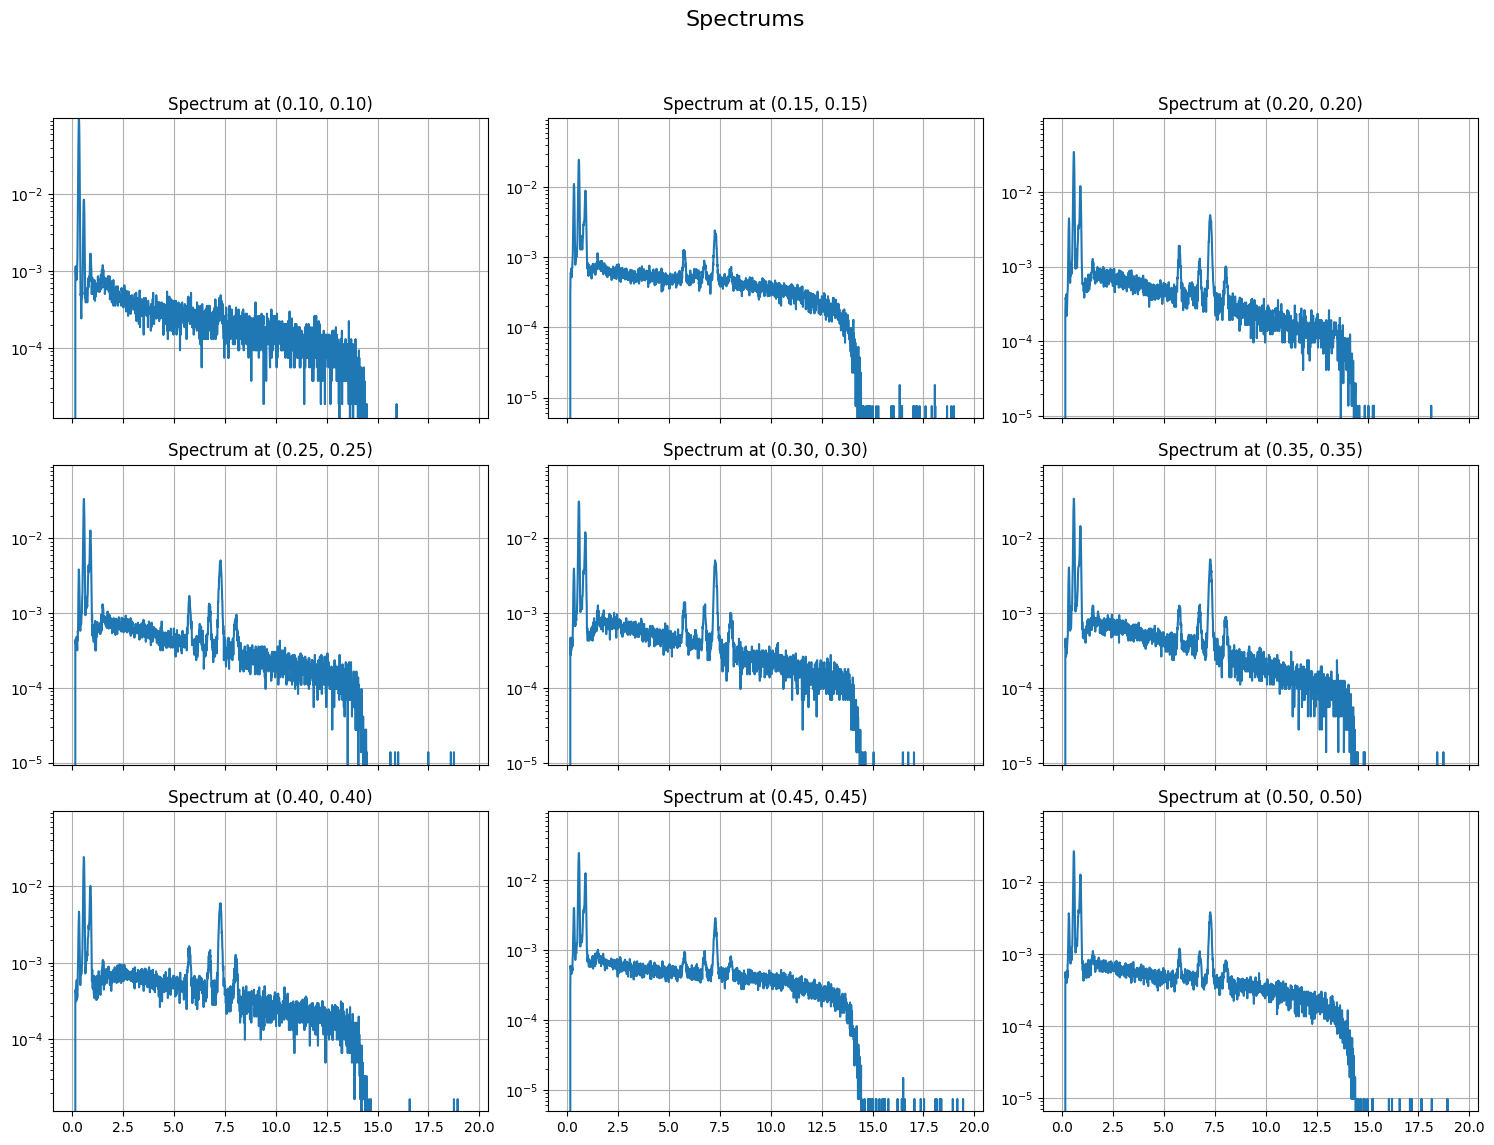

In [7]:

# Nolan's code but it normalizes the spectrum graphs
import glob
import numpy as np
import matplotlib.pyplot as plt
import os
import math

path = r"C:\PhenomData\NickelSpheres\Phatak Email\Test1"
npy_files = glob.glob(os.path.join(path, "*.npy"))

data_arrays = []
for file in npy_files:
    try:
        data = np.load(file)
        if data.ndim == 1:
            data_arrays.append((os.path.basename(file), data))
        else:
            print(f"Skipping {os.path.basename(file)} as it is not a 1D array.")
    except Exception as e:
        print(f"Could not load or process {os.path.basename(file)}: {e}")

data_arrays = data_arrays[:25]  # manual pruning

if data_arrays:
    # Step 1: Find global min and max
    norm_data_arr = [data / np.sum(data) for _, data in data_arrays]
    global_min = min(np.min(data) for data in norm_data_arr)
    global_max = max(np.max(data) for data in norm_data_arr)

    num_plots = len(data_arrays)
    num_cols = math.ceil(math.sqrt(num_plots))
    num_rows = math.ceil(num_plots / num_cols)

    fig, axes = plt.subplots(num_rows, num_cols, sharex=True, figsize=(num_cols * 5, num_rows * 4))

    if num_plots > 1:
        axes = axes.flatten()
    else:
        axes = [axes]

    for i, (filename, data) in enumerate(data_arrays):
        norm_data = norm_data_arr[i] # turns spectra into pdf
        x_values = np.arange(1, len(data) + 1)
        x_values = (x_values * 9.485 + 39.926) / 1000 # If you want to convert to keV
        axes[i].semilogy(x_values, norm_data)
        axes[i].set_title(filename[:-4])
        axes[i].grid(True)
        axes[i].set_ylim(global_min, global_max)  # Step 2: Normalize y-axis

    # Hide any unused subplots
    for i in range(num_plots, len(axes)):
        fig.delaxes(axes[i])

    fig.suptitle("Spectrums", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
else:
    print("No 1D .npy files were found to plot in the specified directory.")

# Below is Nolan's plotting code, which doesn't normalize the spectrum graphs
# import glob
# import numpy as np
# import matplotlib.pyplot as plt
# import os
# import math

# path = r"C:\PhenomData\NickelSpheres\AutomatedEDSSpotMeasurements\Hemisphere9"
# npy_files = glob.glob(os.path.join(path, "*.npy"))

# data_arrays = []
# for file in npy_files:
#     try:
#         data = np.load(file)
#         if data.ndim == 1:
#             data_arrays.append((os.path.basename(file), data))
#         else:
#             print(f"Skipping {os.path.basename(file)} as it is not a 1D array.")
#     except Exception as e:
#         print(f"Could not load or process {os.path.basename(file)}: {e}")

# data_arrays = data_arrays[:25] # manual pruning if ur spicy like me

# if data_arrays:
#     num_plots = len(data_arrays)
#     num_cols = math.ceil(math.sqrt(num_plots))
#     num_rows = math.ceil(num_plots / num_cols)

#     fig, axes = plt.subplots(num_rows, num_cols, sharex=True, figsize=(num_cols * 5, num_rows * 4))

#     if num_plots > 1:
#         axes = axes.flatten()
#     else:
#         axes = [axes]

#     for i, (filename, data) in enumerate(data_arrays):
#         x_values = np.arange(1, len(data) + 1)
#         axes[i].plot(x_values, data)
#         axes[i].set_title(filename)
#         axes[i].grid(True)

#     # Hide any unused subplots
#     for i in range(num_plots, len(axes)):
#         fig.delaxes(axes[i])

#     fig.suptitle("Spectrums", fontsize=16)

#     # Adjust layout to prevent titles from overlapping
#     plt.tight_layout(rect=[0, 0.03, 1, 0.95])

#     plt.show()
# else:
#     print("No 1D .npy files were found to plot in the specified directory.")



### Extract data from HDF5 File and plot it

lead_tin
phenom
3
2025-07-25 12:08:15


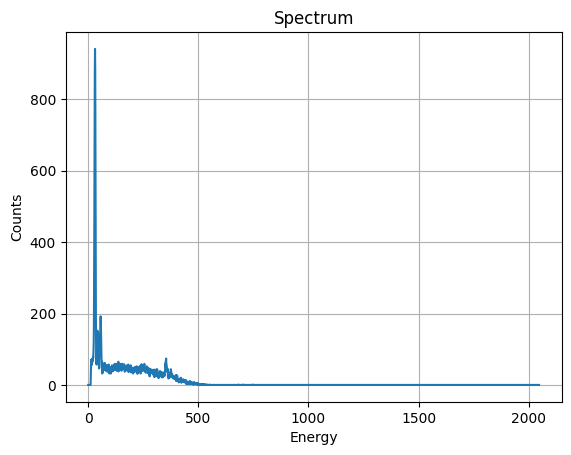

In [34]:
import h5py
import numpy as np

file_path = r"C:\PhenomData\HDF5 File Saving Tests\Test1\Spectrum at (0.50, 0.50).hdf5"
filename = os.path.basename(file_path)
dataset_name = filename[:-5] + '_dataset'

# Print attributes (metadata) of the HDF5 file
with h5py.File(f"{file_path}", "r") as f:
    dset = f[dataset_name]
    print(dset.attrs["Sample Name"])
    print(dset.attrs['Instrument Name'])
    print(dset.attrs['Dwell/Acquisition Time'])
    print(dset.attrs['Date and Time of Acquisition'])

# Plot the HDF5 filee by converting to a numpy array
with h5py.File(f"{file_path}", "r") as f:
    dset = f[dataset_name][:]  # The colon reads the entire dataset into memory as a NumPy array, which is needed for plotting with matplotlib
    
    plt.plot(dset)
    plt.title("Spectrum")
    plt.xlabel("Energy")
    plt.ylabel("Counts")
    plt.grid(True)
    plt.show()

# # Load numpy for comparison
# numpy_spectrum = np.load("C:\PhenomData\HDF5 File Saving Tests\Test1\Spectrum at (0.50, 0.50).npy")
# print(numpy_spectrum[index])

# plt.plot(numpy_spectrum)
# plt.title("1D Dataset")
# plt.xlabel("Index")
# plt.ylabel("Value")
# plt.grid(True)
# plt.show()

## EID test

Spectrum Acquired at (0.5, 0.5)


ArgumentError: Python argument types in
    PyPhenom.Spectroscopy.ReadMsaFile(NoneType)
did not match C++ signature:
    ReadMsaFile(class std::basic_string<char,struct std::char_traits<char>,class std::allocator<char> > filename)

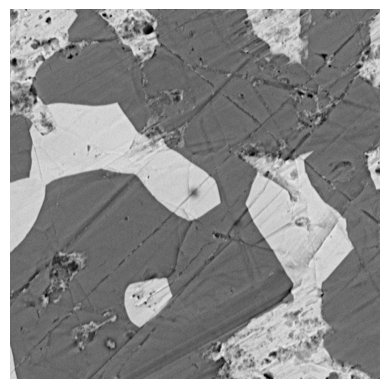

In [ ]:
# Jacques EDS test to test spot marking system

import sys
sys.path.append('code')
from AutoPhenom import getSpotSpectrum
from AutoPhenom import place_spot_marker
from AutoPhenom import initialize_marker_plot
from AutoPhenom import add_marker
from AutoPhenom import save_annotated_image
import time
import numpy as np
from AutoPhenom import AcquireSEMImage_at_current_location
import PyPhenom as ppi
import license
import os

import random

size = (1024,1024)
SavePath = "C:\PhenomData\EDS_Spot_Marking_tests\Test18"
MainPath = "./"

address = ppi.FindPhenom(1).ip
phenom = ppi.Phenom(address,  license.PhenomUsername,  license.PhenomPassword)
# phenom.Activate()
# phenom.MoveToSem()

# Acquire SEM Image at current location
phenom.SetSemSpotSize(3.3) # 3.3 corresponds to imaging
image_path = AcquireSEMImage_at_current_location(SavePath, os.path.basename(SavePath))

dpp = phenom.Spectrometer
settings = ppi.LoadEidSettings()
dpp.ApplySettings(settings.spot)
phenom.SetSemSpotSize(4.1) # 4.1 corresponds to spot imaging
# x = 0
# y = 0.4
# getSpotSpectrum(x,y,size,SavePath,MainPath,dpp,settings,address,phenom,ppi,dwell_time=5)

# Define the values for x and y
#values = [0.1, 0.3, 0.6, 0.9]

# Generate all (x, y) combinations
#measurements = [[x, y] for x in values for y in values]
measurements = [[0.5, 0.5]]

# measurements = [[0, 0.5], [0.25, 0.5], [0.5, 0.5], [0.75,0.5], [1.0, 0.5]] # Horizontal line of measurements
# measurements = [[0.5, 0.0], [0.5, 0.25], [0.5, 0.5], [0.5,0.75], [0.5, 1.0]] # Vertical line of measurements
# Get spot measurements
spectrums = []
fig, ax, image_shape = initialize_marker_plot(image_path)
for measurement in measurements:
    msa_path = getSpotSpectrum(measurement[0], measurement[1], size,SavePath, MainPath, image_path, dpp,settings,address,phenom,ppi,dwell_time=20)
    spectrum = ppi.Spectroscopy.EdxAcquisitionFromMsa(ppi.Spectroscopy.ReadMsaFile(msa_path))
    spectrums.append(spectrum)
    os.chdir(SavePath)
    add_marker(ax, image_shape, measurement)
    # place_spot_marker(image_path, (measurement[0],measurement[1]))
image_with_spot_marks = save_annotated_image(fig, image_path)

In [2]:
spectrum = spectrums[-1]
quantification = ppi.Spectroscopy.Quantify(spectrum)

RuntimeError: Missing license: Spectroscopy

## Plot two spectrums on top of each other (keV units)

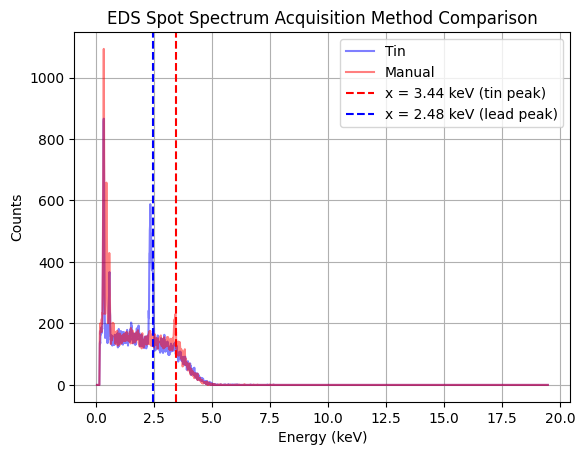

In [20]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import h5py
import os
import math
from AutoPhenom import convert_spectrum



# manual_spectrum = convert_spectrum("C:\PhenomData\X_Axis_Tests\Test2\Manual\Export\Image 1_spot_1\spectrum.emsa")
manual_spectrum = np.load(r"C:\Users\labuser\Downloads\PyPhenom (2.1)\PyPhenom\Jacques_Argonne_Internship\Phenom Repositories\SLADS-Net_V3\SLADS-Net\Jacques Random\Spectra\Spectrum_run_2025-08-22_11-00-49.npy")
automated_spectrum = np.load(r"c:\Users\labuser\Downloads\PyPhenom (2.1)\PyPhenom\Jacques_Argonne_Internship\Phenom Repositories\SLADS-Net_V3\SLADS-Net\Jacques Random\Spectra\Spectrum_run_2025-08-22_11-13-20.npy")
# Convert bin indices to keV values
manual_indices = np.arange(1, len(manual_spectrum) + 1)
manual_x_values = (manual_indices * 9.485 + 39.926) / 1000  # Convert to keV

automated_indices = np.arange(1, len(automated_spectrum) + 1)
automated_x_values = (automated_indices * 9.485 + 39.926) / 1000  # Convert to keV
# plt.plot(x, y, 'r-', alpha=0.7)
plt.plot(automated_x_values, automated_spectrum, color = 'blue', alpha = 0.5, label='Tin')
plt.plot(manual_x_values, manual_spectrum, color = 'red', alpha = 0.5, label='Manual')
plt.title('EDS Spot Spectrum Acquisition Method Comparison')
plt.xlabel('Energy (keV)')  
plt.ylabel('Counts')
plt.axvline(x=3.44, color='red', linestyle='--', label='x = 3.44 keV (tin peak)')
plt.axvline(x=2.46, color='blue', linestyle='--', label='x = 2.48 keV (lead peak)')
plt.grid(True)
plt.legend()
plt.show()

## Plot Radially Progressive Spectra on top of each other

In [4]:
measurements = np.linspace(0.1, 0.5, 9)
measurements

array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ])

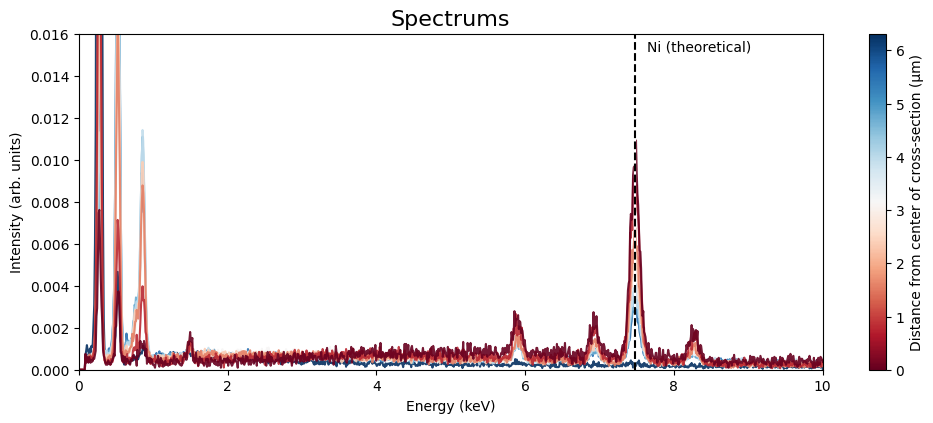

In [76]:
# Nolan's code but it normalizes the spectrum graphs
import glob
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import cmcrameri.cm as cmc
from matplotlib.cm import RdBu, viridis, magma, inferno, plasma, cool, coolwarm, turbo
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib.cm import ScalarMappable
import matplotlib.colors as colors
import os
import math

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap
# print(plt.colormaps())
path = r"C:\PhenomData\NickelSpheres\Phatak Email\Test3"
npy_files = glob.glob(os.path.join(path, "*.npy"))

data_arrays = []
for file in npy_files:
    try:
        data = np.load(file)
        if data.ndim == 1:
            data_arrays.append((os.path.basename(file), data))
        else:
            print(f"Skipping {os.path.basename(file)} as it is not a 1D array.")
    except Exception as e:
        print(f"Could not load or process {os.path.basename(file)}: {e}")
#data_arrays.reverse()

#data_arrays = data_arrays[:25]  # manual pruning

if data_arrays:
    # Normalize the data
    norm_data_arr = [data / np.sum(data) for _, data in data_arrays]
    fig, axes = plt.subplots(figsize=(10, 4.5))

    # Set up the colormap and normalization
    distances = [(math.sqrt(2) * (0.5 - m)) * 11.16 for m in measurements]
    norm = Normalize(vmin=min(distances), vmax=max(distances))
    base_cmap = cmc.berlin
    base_cmap = coolwarm
    base_cmap = cmc.managua
    base_cmap = viridis
    base_cmap = RdBu
    colors_list = [
        (0.0, 'red'),     # Low end
        (0.5, 'purple'),   # Middle is black instead of white
        (1.0, 'blue')     # High end
    ]

    custom_cmap = LinearSegmentedColormap.from_list('RedBlackBlue', colors_list)
    cmap = truncate_colormap(base_cmap, 0.0, 1.0) # Truncate the color map if you don't want the extremes for example
    
    # get_colors = lambda dist : plt.cm.RdBu([2 * dist,])
    for i, (filename, data) in enumerate(data_arrays):
        distance = distances[i]
        color = cmap(norm(distance))
        norm_data = norm_data_arr[i] # turns spectra into pdf
        x_values = np.arange(1, len(data) + 1)
        x_values = (x_values * 9.845 - 39.926) / 1000 # If you want to convert to keV
        axes.plot(x_values, norm_data, color=color, alpha=0.9)
        #axes.set_title(filename[:-4])
        #axes.grid(True)

    plt.title("Spectrums", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    # plt.axvline(x=0.28, color='purple', alpha = 0.9, linestyle='--') # Carbon
    #plt.axvline(x=7.48, color='#444444', alpha = 0.9, linewidth = 3, linestyle='--') # Nickel
    plt.axvline(x=7.48, color='white', linewidth=1.6)
    plt.axvline(x=7.48, color='black', linestyle='--', linewidth=1.5)
    ylim = 0.016
    
    plt.text(7.64, ylim * 0.95, 'Ni (theoretical)', rotation=0, fontfamily='sans-serif')

    #import matplotlib.patheffects as path_effects
    #text = plt.text(7.64, ylim * 0.95, 'Ni', fontsize=10, color='black')
    #text.set_path_effects([path_effects.Stroke(linewidth=2, foreground='white'),
    #                   path_effects.Normal()])
    
    plt.xlim([0, 10])
    plt.ylim([0, ylim])
    #plt.ylim([0.0001, 0.01])
    plt.xlabel('Energy (keV)')  
    plt.ylabel('Intensity (arb. units)')
    #plt.colorbar()
    # Create colorbar
    sm = ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])  # Needed for colorbar to work
    cbar = plt.colorbar(sm, ax=axes)
    cbar.set_label("Distance from center of cross-section (μm)")
    plt.show()
else:
    print("No 1D .npy files were found to plot in the specified directory.")

In [26]:
plt.imshow(np.random.rand(144, 144), cmap='plasma')
plt.colorbar()

NameError: name 'plt' is not defined

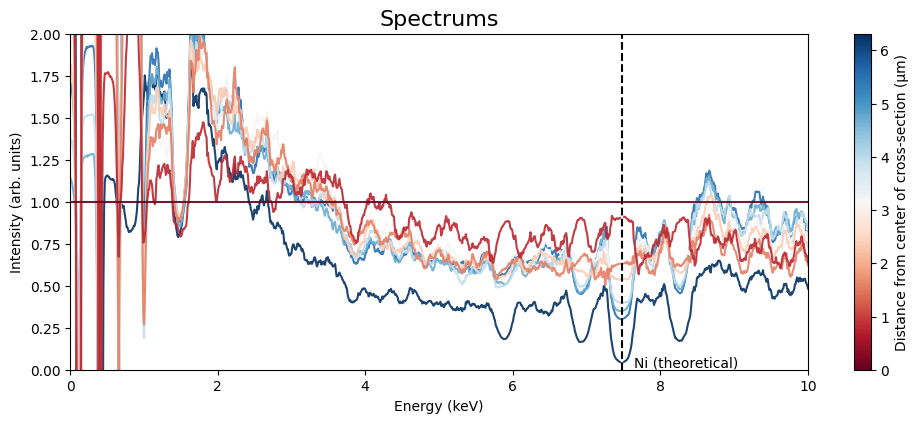

In [90]:
# Nolan's code but it normalizes the spectrum graphs
import glob
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import cmcrameri.cm as cmc
from matplotlib.cm import RdBu, viridis, magma, inferno, plasma, cool, coolwarm, turbo
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib.cm import ScalarMappable
import matplotlib.colors as colors
from scipy.signal import savgol_filter
import os
import math

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap
# print(plt.colormaps())
path = r"C:\PhenomData\NickelSpheres\Phatak Email\Test3"
npy_files = glob.glob(os.path.join(path, "*.npy"))

data_arrays = []
for file in npy_files:
    try:
        data = np.load(file)
        if data.ndim == 1:
            data_arrays.append((os.path.basename(file), data))
        else:
            print(f"Skipping {os.path.basename(file)} as it is not a 1D array.")
    except Exception as e:
        print(f"Could not load or process {os.path.basename(file)}: {e}")
#data_arrays.reverse()

#data_arrays = data_arrays[:25]  # manual pruning
base_spectrum = data_arrays[-1][1]

if data_arrays:
    # Normalize the data
    burr = 1e-4
    preprocess = lambda spectrum : burr + savgol_filter(spectrum / np.sum(spectrum), 30, 3)
    norm_data_arr = [preprocess(data) / preprocess(base_spectrum) for _, data in data_arrays]
    fig, axes = plt.subplots(figsize=(10, 4.5))

    # Set up the colormap and normalization
    distances = [(math.sqrt(2) * (0.5 - m)) * 11.16 for m in measurements]
    norm = Normalize(vmin=min(distances), vmax=max(distances))
    base_cmap = cmc.berlin
    base_cmap = coolwarm
    base_cmap = cmc.managua
    base_cmap = viridis
    base_cmap = RdBu
    colors_list = [
        (0.0, 'red'),     # Low end
        (0.5, 'purple'),   # Middle is black instead of white
        (1.0, 'blue')     # High end
    ]

    custom_cmap = LinearSegmentedColormap.from_list('RedBlackBlue', colors_list)
    cmap = truncate_colormap(base_cmap, 0.0, 1.0) # Truncate the color map if you don't want the extremes for example
    
    # get_colors = lambda dist : plt.cm.RdBu([2 * dist,])
    for i, (filename, data) in enumerate(data_arrays):
        distance = distances[i]
        color = cmap(norm(distance))
        norm_data = norm_data_arr[i] # turns spectra into pdf
        x_values = np.arange(1, len(data) + 1)
        x_values = (x_values * 9.845 - 39.926) / 1000 # If you want to convert to keV
        axes.plot(x_values, norm_data, color=color, alpha=0.9)
        #axes.set_title(filename[:-4])
        #axes.grid(True)

    plt.title("Spectrums", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    # plt.axvline(x=0.28, color='purple', alpha = 0.9, linestyle='--') # Carbon
    #plt.axvline(x=7.48, color='#444444', alpha = 0.9, linewidth = 3, linestyle='--') # Nickel
    plt.axvline(x=7.48, color='white', linewidth=1.6)
    plt.axvline(x=7.48, color='black', linestyle='--', linewidth=1.5)
    ylim = 0.016
    
    plt.text(7.64, ylim * 0.95, 'Ni (theoretical)', rotation=0, fontfamily='sans-serif')

    #import matplotlib.patheffects as path_effects
    #text = plt.text(7.64, ylim * 0.95, 'Ni', fontsize=10, color='black')
    #text.set_path_effects([path_effects.Stroke(linewidth=2, foreground='white'),
    #                   path_effects.Normal()])
    
    plt.xlim([0, 10])
    plt.ylim([0, 2])
    #plt.ylim([0.0001, 0.01])
    plt.xlabel('Energy (keV)')  
    plt.ylabel('Intensity (arb. units)')
    #plt.colorbar()
    # Create colorbar
    sm = ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])  # Needed for colorbar to work
    cbar = plt.colorbar(sm, ax=axes)
    cbar.set_label("Distance from center of cross-section (μm)")
    plt.show()
else:
    print("No 1D .npy files were found to plot in the specified directory.")

In [79]:
data_arrays[-1][1]

array([0, 0, 0, ..., 0, 0, 0])

## Hyperspy Testing (wasn't able to make it work because I think we need k factors from the phenom manufacturers)

In [ ]:
import hyperspy.api as hs

s = exspy.data.EDS_TEM_FePt_nanoparticles()
s.add_lines()
kfactors = [1.450226, 5.075602] #For Fe Ka and Pt La
bw = s.estimate_background_windows(line_width=[5.0, 2.0])
intensities = s.get_lines_intensity(background_windows=bw)
atomic_percent = s.quantification(intensities, method='CL',
                                  factors=kfactors)

pdir (0.2.2)
pip (1.5.4)
setuptools (2.1)


In [1]:
import numpy as np

# Parameters
rows, cols = 256, 256
num_ones = 6
save_path = r"C:\Users\labuser\Downloads\PyPhenom (2.1)\PyPhenom\Jacques_Argonne_Internship\Phenom Repositories\SLADS-Net_V2\SLADS-Net\ResultsAndData\InitialSamplingMasks\H_1_256_256_Percentage_0.01"  # Change to your desired path

# Create a flat array of zeros
array = np.zeros(rows * cols, dtype=np.uint8)

# Randomly choose indices for the 1's
indices = np.random.choice(rows * cols, size=num_ones, replace=False)
array[indices] = 1

# Reshape to 256x256
array = array.reshape((rows, cols))

# Save the array
np.save(save_path, array)

print(f"Array saved to {save_path}")
print(f"Number of 1's: {np.sum(array)}")


Array saved to C:\Users\labuser\Downloads\PyPhenom (2.1)\PyPhenom\Jacques_Argonne_Internship\Phenom Repositories\SLADS-Net_V2\SLADS-Net\ResultsAndData\InitialSamplingMasks\H_1_256_256_Percentage_0.01
Number of 1's: 6
